In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [31]:
# Visualise dataset
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated    

In [69]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

amazon_data_dir = 'domain_adaptation_images/amazon/images'
amazon_images = datasets.ImageFolder(amazon_data_dir,transform=transform)
amazonDataloader = torch.utils.data.DataLoader(amazon_images, batch_size=1,shuffle=True)
images_classes = amazon_images.classes

webcam_data_dir = 'domain_adaptation_images/webcam/images'
webcam_images = datasets.ImageFolder(webcam_data_dir,transform=transform)
webcamDataloader = torch.utils.data.DataLoader(webcam_images, batch_size=1,shuffle=True)

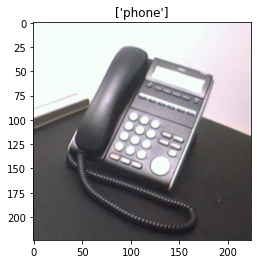

In [82]:
inputs, labels = next(iter(webcamDataloader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[images_classes[x] for x in labels])

In [83]:
model = models.resnet18(pretrained=True)
model.eval()
if torch.cuda.is_available():
    inputs = inputs.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(inputs)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

dial telephone 0.399690717458725
remote control 0.3308418095111847
pay-phone 0.11645937711000443
joystick 0.03468851000070572
cellular telephone 0.020566534250974655
